classes:  ['pekan 1 anorganik', 'pekan 1 organik']


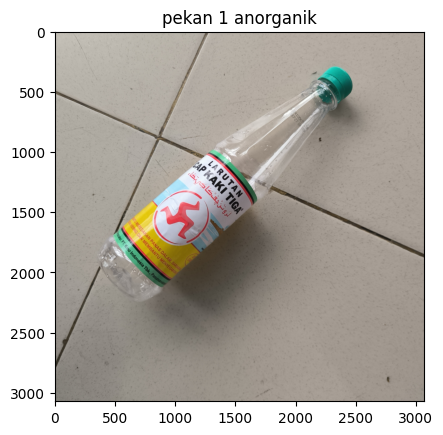

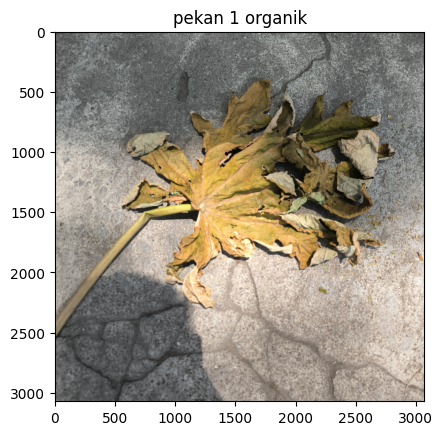

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

dataset_path = "D:/shaff/kuliah/semester5/DL/project_sampah/FotoSampah/pekan1"
classes = os.listdir(dataset_path)
print("classes: ", classes)

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    sample_imgs = os.listdir(class_path)

    if len(sample_imgs) > 0:
        sample_img = sample_imgs[0]
        img = mpimg.imread(os.path.join(class_path, sample_img))
        plt.imshow(img)
        plt.title(cls)
        plt.show()
    else:
        print(f"Tidak ada gambar di folder: {cls}")


In [2]:
from tensorflow.keras.callbacks import EarlyStopping

# Inisialisasi callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',        # Metrik yang dipantau (misalnya, val_loss)
    patience=10,                # Berhenti jika tidak ada peningkatan selama 5 epoch
    restore_best_weights=True  # Mengembalikan bobot dari epoch terbaik
)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Ukuran input untuk ResNet50 dan VGG16
    batch_size=32,
    class_mode='binary',  # Binary untuk 2 kelas
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 144 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [4]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

def build_pretrained_resnet(input_shape=(224, 224, 3), num_classes=1):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze base model
    base_model.trainable = False
    
    # Add custom layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='sigmoid')(x)  # Sigmoid untuk klasifikasi biner
    
    model = Model(inputs=base_model.input, outputs=output)
    
    return model

model_resnet_pretrained = build_pretrained_resnet()
model_resnet_pretrained.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
def build_pretrained_vgg16(input_shape=(224, 224, 3), num_classes=1):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze base model
    base_model.trainable = False
    
    # Add custom layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='sigmoid')(x)  # Sigmoid untuk klasifikasi biner
    
    model = Model(inputs=base_model.input, outputs=output)
    
    return model

model_vgg16_pretrained = build_pretrained_vgg16()
model_vgg16_pretrained.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
history_resnet_pretrained = model_resnet_pretrained.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=[early_stopping]
)


C:\Users\TUF\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4929 - loss: 0.8518

C:\Users\TUF\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.4895 - loss: 0.8492 - val_accuracy: 0.5833 - val_loss: 0.7104
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.6086 - loss: 0.7898 - val_accuracy: 0.4167 - val_loss: 0.7924
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5135 - loss: 0.7895 - val_accuracy: 0.5833 - val_loss: 0.7295
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5405 - loss: 0.7890 - val_accuracy: 0.4167 - val_loss: 0.7086
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5941 - loss: 0.6825 - val_accuracy: 0.5833 - val_loss: 0.7076
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5663 - loss: 0.7581 - val_accuracy: 0.5000 - val_loss: 0.6982
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5476 - loss: 0.7377 - val_accuracy: 0.5278 - val_loss: 0.6611
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5845 - loss: 0.7077 - val_accuracy: 0.6667 - val_loss: 0.6878
Epoch 9/100


In [7]:
history_vgg16_pretrained = model_vgg16_pretrained.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.5863 - loss: 0.6623 - val_accuracy: 0.5833 - val_loss: 0.6232
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5899 - loss: 0.6683 - val_accuracy: 0.8611 - val_loss: 0.5699
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5520 - loss: 0.6674 - val_accuracy: 0.8611 - val_loss: 0.5377
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.6892 - loss: 0.6187 - val_accuracy: 0.8056 - val_loss: 0.4963
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.6860 - loss: 0.6046 - val_accuracy: 0.8333 - val_loss: 0.4816
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.7366 - loss: 0.5517 - val_accuracy: 0.7778 - val_loss: 0.4992
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.7322 - loss: 0.5483 - val_accuracy: 0.8611 - val_loss: 0.4402
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.7762 - loss: 0.5397 - val_accuracy: 0.8333 - val_loss: 0.4457


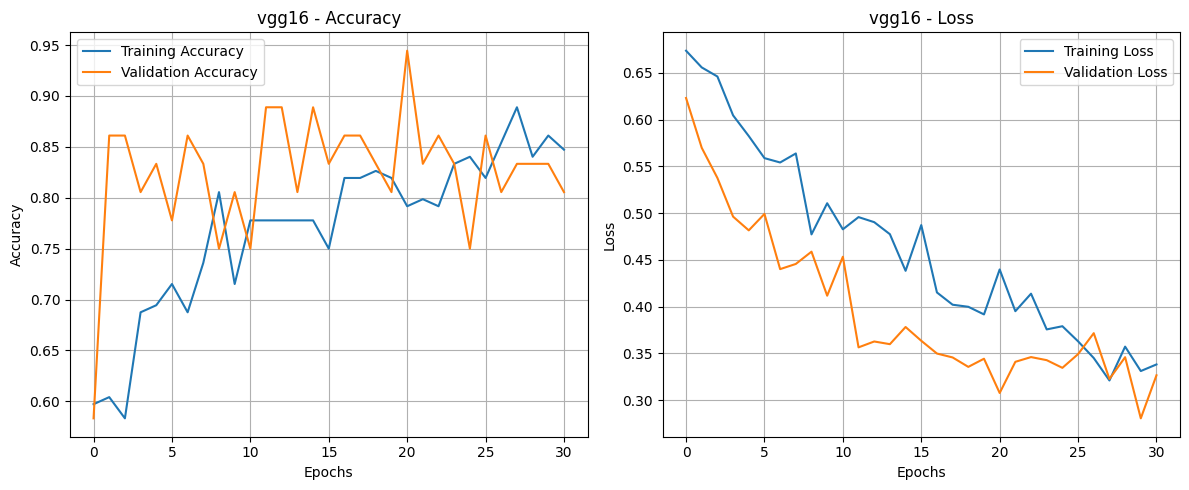

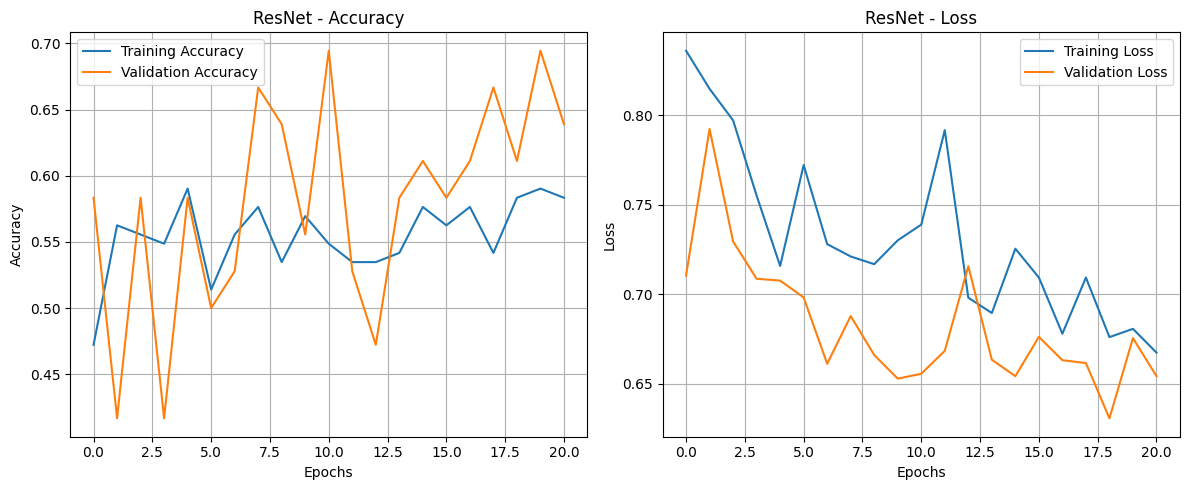

In [8]:
import matplotlib.pyplot as plt

def plot_learning_curve(history, model_name):
    """
    Membuat plot learning curve untuk accuracy dan loss.
    :param history: History dari model setelah training.
    :param model_name: Nama model untuk ditampilkan di judul.
    """
    # Plot Accuracy
    plt.figure(figsize=(12, 5))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Show plot
    plt.tight_layout()
    plt.show()

# Plot learning curve untuk vgg16
plot_learning_curve(history_vgg16_pretrained, "vgg16")

# Plot learning curve untuk ResNet
plot_learning_curve(history_resnet_pretrained, "ResNet")


In [9]:
# Evaluate resnet on validation data
val_loss, val_acc = model_resnet_pretrained.evaluate(val_generator)
print(f"Resnet Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Resnet Validation Loss: {val_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.7106 - loss: 0.6481
Resnet Validation Accuracy: 72.22%
Resnet Validation Loss: 0.6450


In [10]:
# Evaluate vgg16 on validation data
val_loss, val_acc = model_vgg16_pretrained.evaluate(val_generator)
print(f"vgg16 Validation Accuracy: {val_acc * 100:.2f}%")
print(f"vgg16 Validation Loss: {val_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.8947 - loss: 0.3548
vgg16 Validation Accuracy: 88.89%
vgg16 Validation Loss: 0.3515


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate model
val_preds_vgg16 = model_vgg16_pretrained.predict(val_generator)
val_preds_resnet = model_resnet_pretrained.predict(val_generator)

val_true_labels = val_generator.labels  # Label sebenarnya dari generator

# Untuk klasifikasi biner, gunakan threshold 0.5
val_pred_labels_vgg16 = (val_preds_vgg16 > 0.5).astype(int).flatten()
val_pred_labels_resnet = (val_preds_resnet > 0.5).astype(int).flatten()

# Confusion Matrix untuk ResNet
print("Confusion Matrix ResNet:")
cm_resnet = confusion_matrix(val_true_labels, val_pred_labels_resnet)
print(cm_resnet)

# Confusion Matrix untuk VGG16
print("Confusion Matrix VGG16:")
cm_vgg16 = confusion_matrix(val_true_labels, val_pred_labels_vgg16)
print(cm_vgg16)

# Classification Report (Opsional)
print("\nClassification Report ResNet:")
print(classification_report(val_true_labels, val_pred_labels_resnet, target_names=['Organik', 'Non-Organik']))

print("\nClassification Report VGG16:")
print(classification_report(val_true_labels, val_pred_labels_vgg16, target_names=['Organik', 'Non-Organik']))


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 289ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Confusion Matrix ResNet:
[[14  7]
 [ 9  6]]
Confusion Matrix VGG16:
[[12  9]
 [ 7  8]]

Classification Report ResNet:
              precision    recall  f1-score   support

     Organik       0.61      0.67      0.64        21
 Non-Organik       0.46      0.40      0.43        15

    accuracy                           0.56        36
   macro avg       0.54      0.53      0.53        36
weighted avg       0.55      0.56      0.55        36


Classification Report VGG16:
              precision    recall  f1-score   support

     Organik       0.63      0.57      0.60        21
 Non-Organik       0.47      0.53      0.50        15

    accuracy                           0.56        36
   macro avg       0.55      0.55      0.55        36
weighted avg       0.56      0.56      0.56        36



In [12]:
#Miss Classification Rate
def calculate_miss_classification_rate(confusion_matrix):
    total_samples = np.sum(confusion_matrix)
    total_misclassified = total_samples - np.trace(confusion_matrix)
    mcr = total_misclassified / total_samples
    return mcr

# Hitung Miss Classification Rate untuk AlexNet
mcr_resnet= calculate_miss_classification_rate(cm_resnet)
print(f"Miss Classification Rate resnet: {mcr_resnet:.2f}")

# Hitung Miss Classification Rate untuk VGG16
mcr_vgg16 = calculate_miss_classification_rate(cm_vgg16)
print(f"Miss Classification Rate VGG16: {mcr_vgg16:.2f}")


Miss Classification Rate resnet: 0.44
Miss Classification Rate VGG16: 0.44


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step


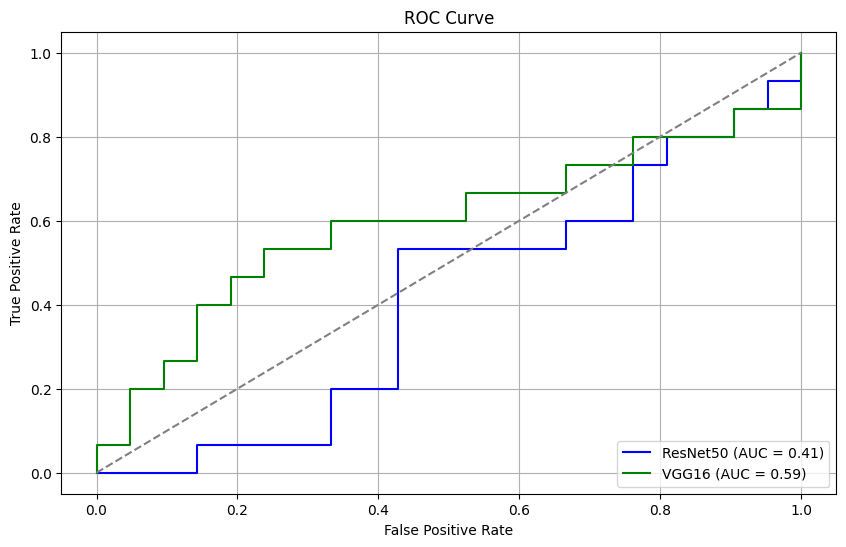

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prediksi probabilitas untuk ResNet dan VGG16
val_probs_resnet = model_resnet_pretrained.predict(val_generator).flatten()
val_probs_vgg16 = model_vgg16_pretrained.predict(val_generator).flatten()

# True labels
val_true_labels = val_generator.labels

# ROC untuk ResNet
fpr_resnet, tpr_resnet, _ = roc_curve(val_true_labels, val_probs_resnet)
roc_auc_resnet = auc(fpr_resnet, tpr_resnet)

# ROC untuk VGG16
fpr_vgg16, tpr_vgg16, _ = roc_curve(val_true_labels, val_probs_vgg16)
roc_auc_vgg16 = auc(fpr_vgg16, tpr_vgg16)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_resnet, tpr_resnet, color='blue', label=f'ResNet50 (AUC = {roc_auc_resnet:.2f})')
plt.plot(fpr_vgg16, tpr_vgg16, color='green', label=f'VGG16 (AUC = {roc_auc_vgg16:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [14]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Muat gambar untuk prediksi
img_path = "C:/Users/TUF/Downloads/organik1.jpg"  # Ganti dengan path ke gambar Anda
img = load_img(img_path, target_size=(224, 224))  # Resize sesuai ukuran input model
img_array = img_to_array(img)  # Ubah ke array numpy
img_array = img_array / 255.0  # Normalisasi piksel ke [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

# Lakukan prediksi dengan model ResNet50
predictions_resnet = model_resnet_pretrained.predict(img_array)
predicted_class_resnet = np.argmax(predictions_resnet, axis=1)  # Ambil kelas dengan probabilitas tertinggi

# Lakukan prediksi dengan model VGG16
predictions_vgg = model_vgg16_pretrained.predict(img_array)
predicted_class_vgg = np.argmax(predictions_vgg, axis=1)  # Ambil kelas dengan probabilitas tertinggi

# Tampilkan hasil prediksi
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label kelas Anda
print(f"Prediksi ResNet50: {class_labels[predicted_class_resnet[0]]} (Probabilitas: {predictions_resnet[0]})")
print(f"Prediksi VGG16: {class_labels[predicted_class_vgg[0]]} (Probabilitas: {predictions_vgg[0]})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Prediksi ResNet50: Organik (Probabilitas: [0.37970525])
Prediksi VGG16: Organik (Probabilitas: [0.7214251])


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


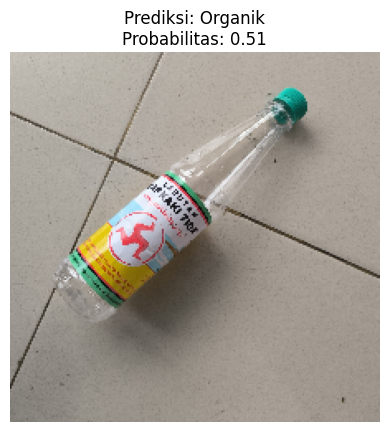

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


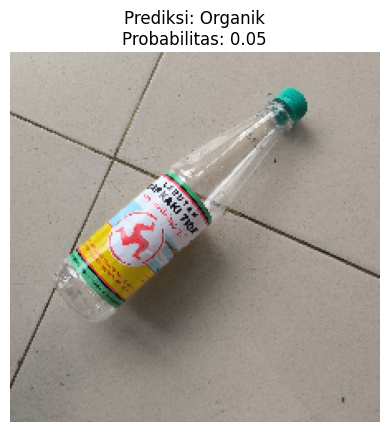

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Fungsi untuk prediksi dan visualisasi gambar
def predict_and_show(image_path, model, class_labels):
    # Muat gambar
    img = load_img(image_path, target_size=(224, 224))  # Resize gambar ke (224, 224)
    img_array = img_to_array(img)  # Ubah ke array numpy
    img_array = img_array / 255.0  # Normalisasi nilai piksel ke [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    
    # Prediksi menggunakan model
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Ambil indeks kelas dengan probabilitas tertinggi
    
    # Tampilkan gambar dan hasil prediksi
    plt.imshow(img)
    plt.axis('off')  # Hilangkan sumbu
    plt.title(f"Prediksi: {class_labels[predicted_class[0]]}\nProbabilitas: {predictions[0][predicted_class[0]]:.2f}")
    plt.show()

# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik1.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


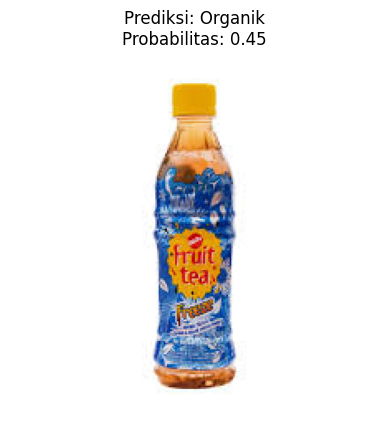

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


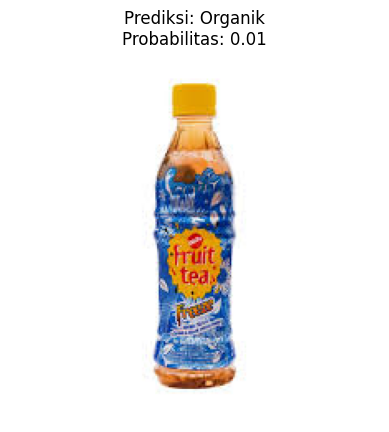

In [16]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik2.jpeg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


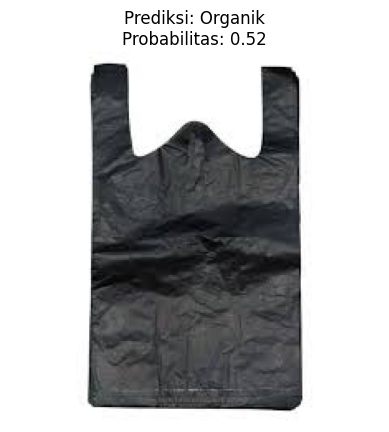

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


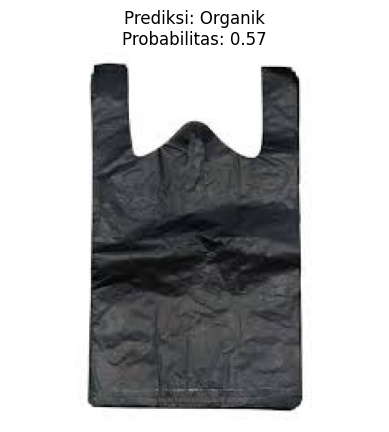

In [17]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik3.jpeg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


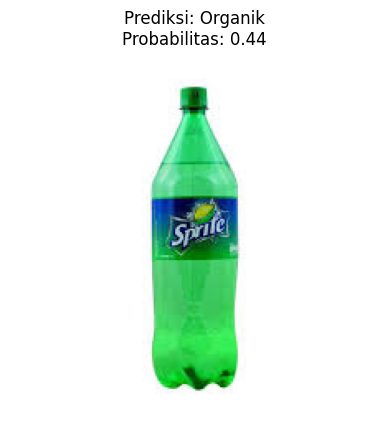

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


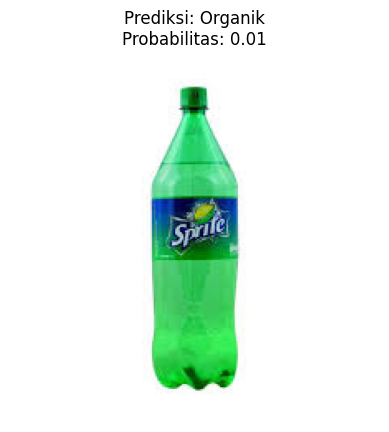

In [18]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik4.jpeg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


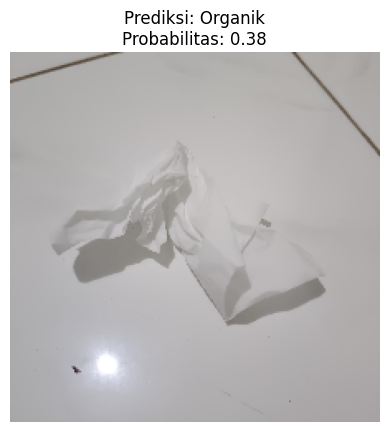

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


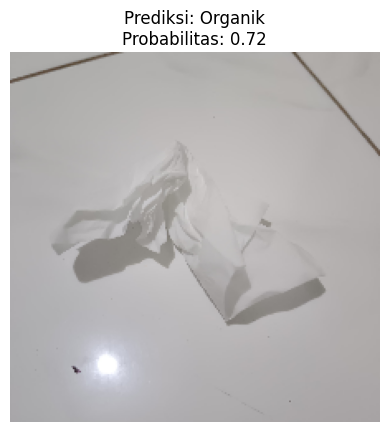

In [19]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/organik1.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


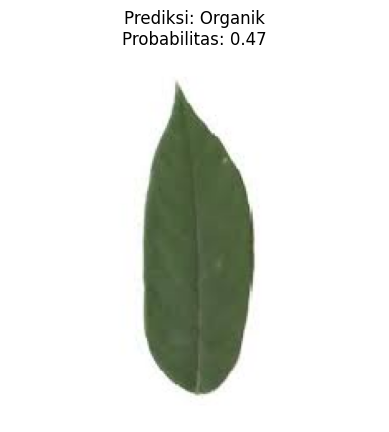

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


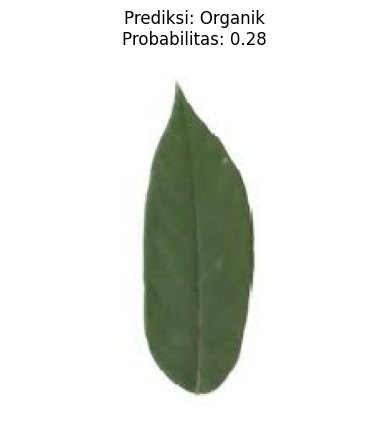

In [20]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/organik2.jpeg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


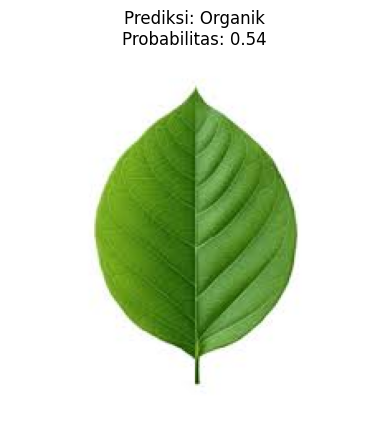

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


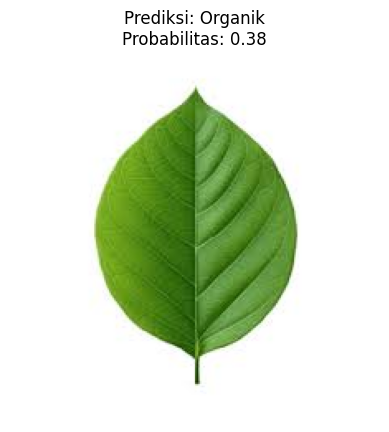

In [21]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/organik3.jpeg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


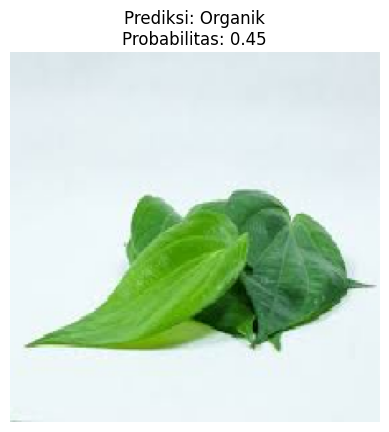

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


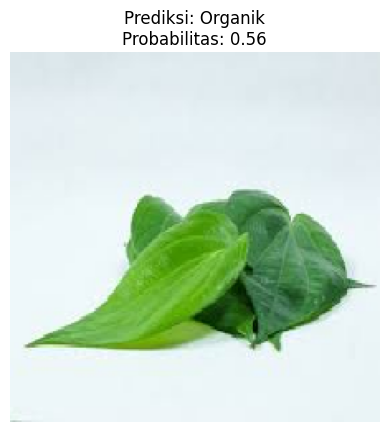

In [22]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/organik4.jpeg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


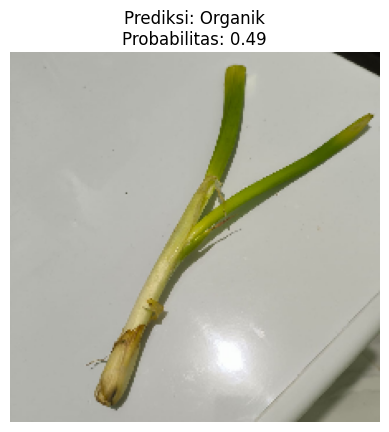

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


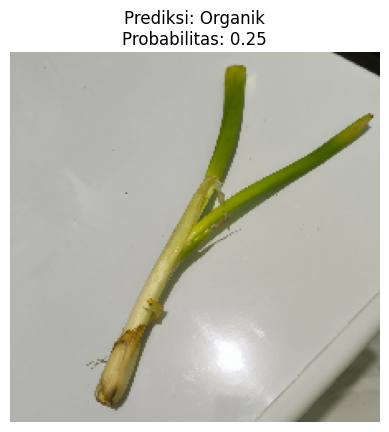

In [26]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/organik5.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


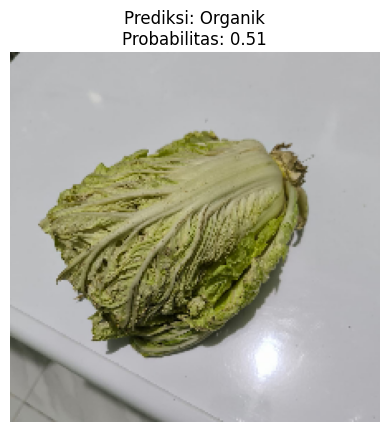

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


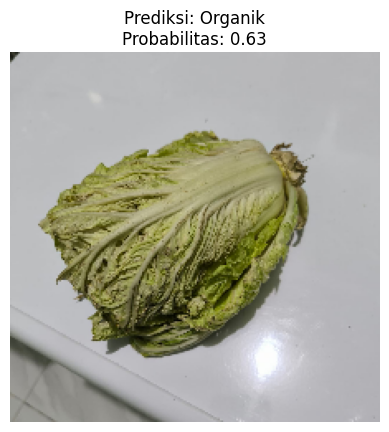

In [27]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/organik6.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


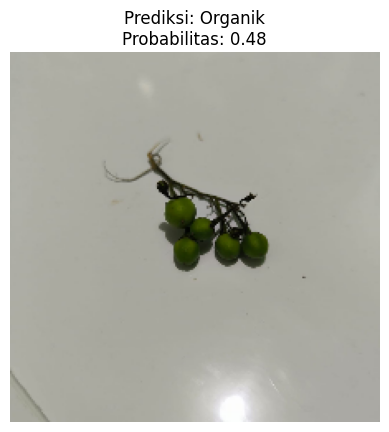

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


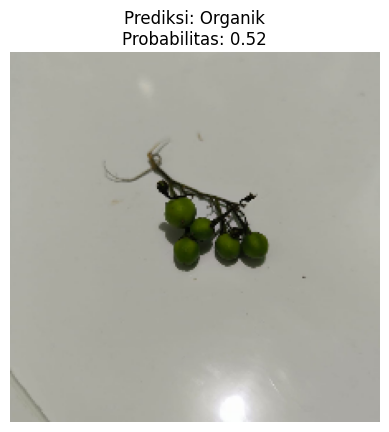

In [28]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/organik7.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


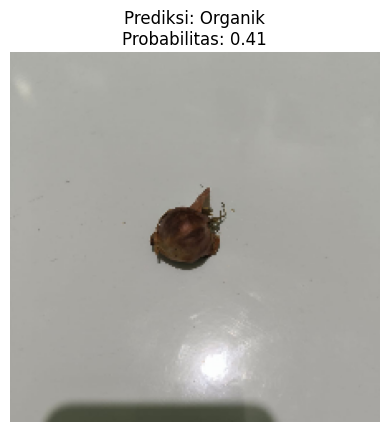

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


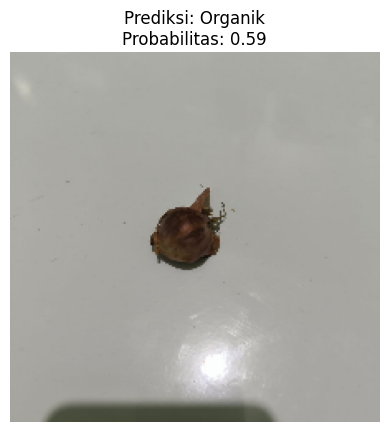

In [30]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/organik8.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


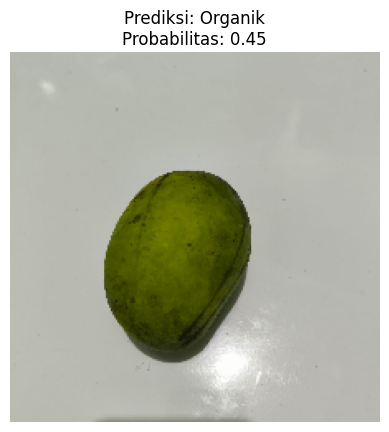

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


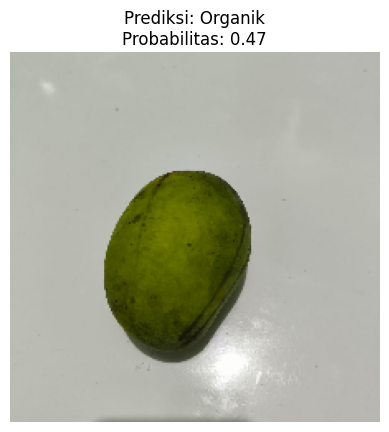

In [31]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/organik9.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


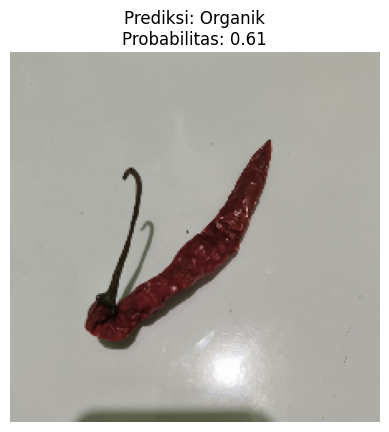

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


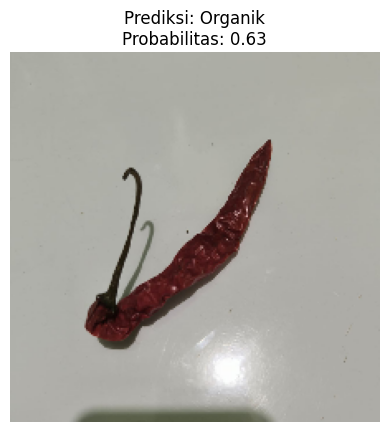

In [32]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/organik10.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


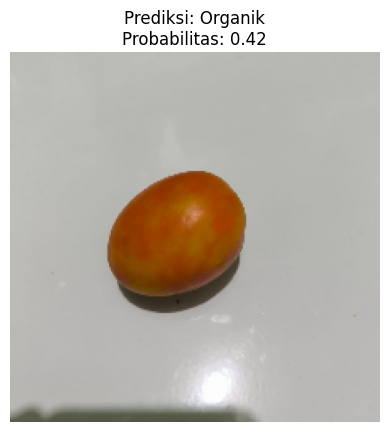

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


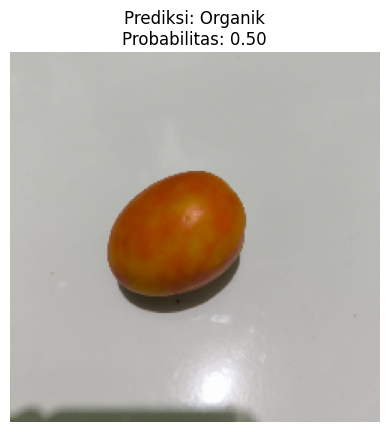

In [33]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/organik11.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


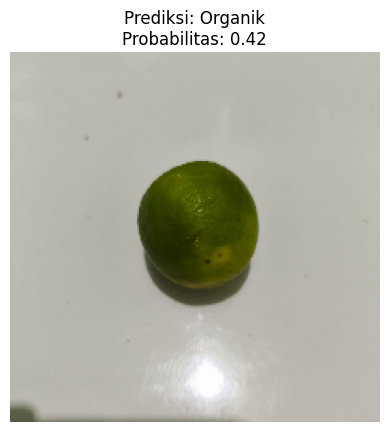

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


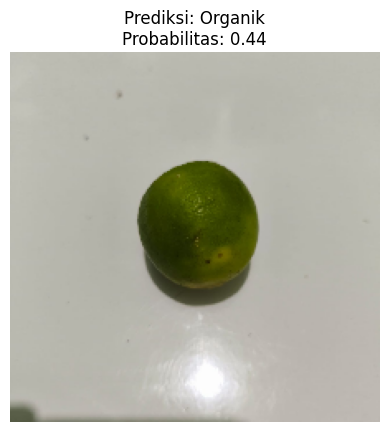

In [34]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/organik12.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


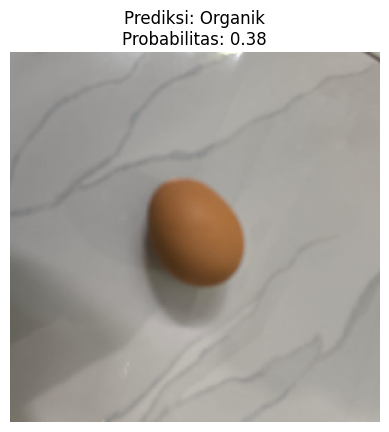

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


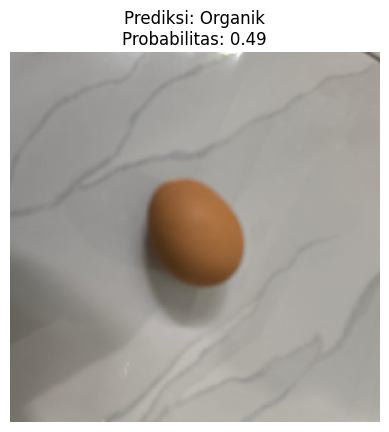

In [35]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/organik13.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


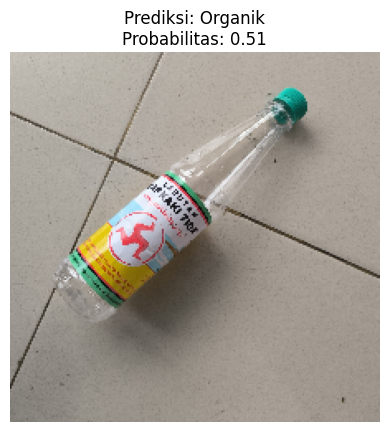

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


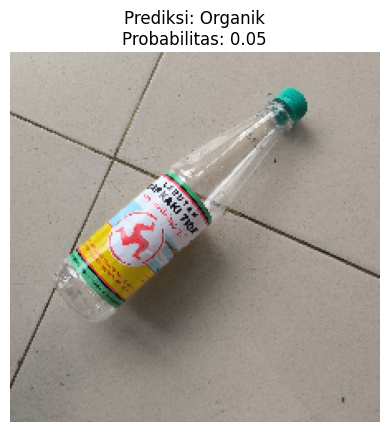

In [37]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik1.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


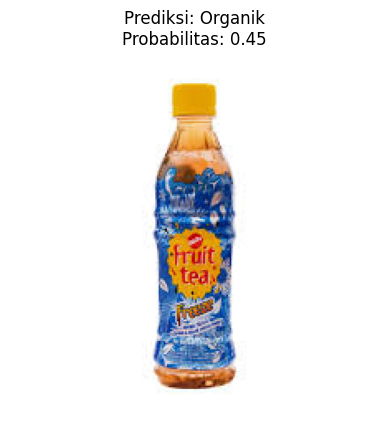

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


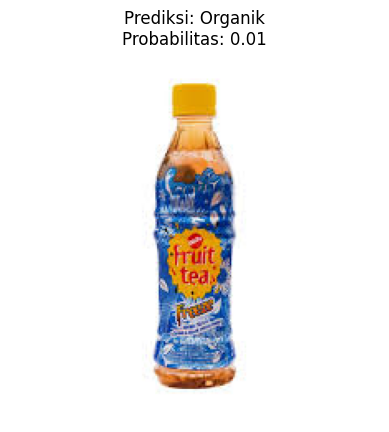

In [42]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik2.jpeg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


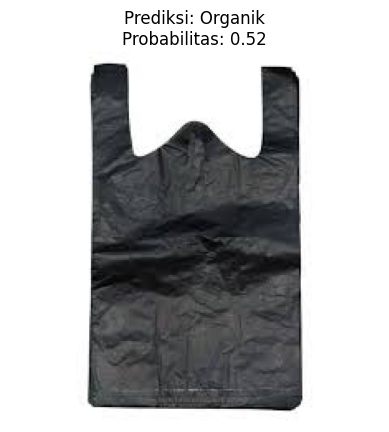

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


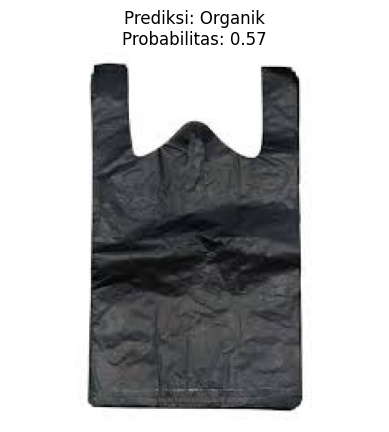

In [43]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik3.jpeg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


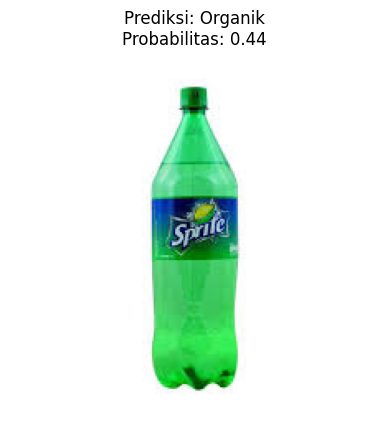

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


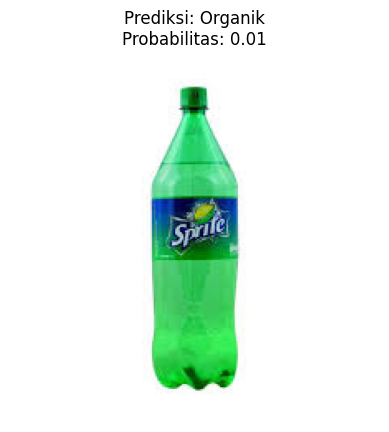

In [44]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik4.jpeg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


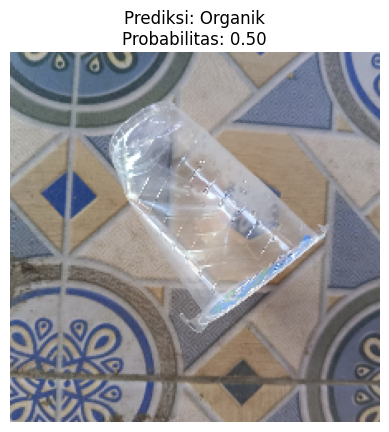

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


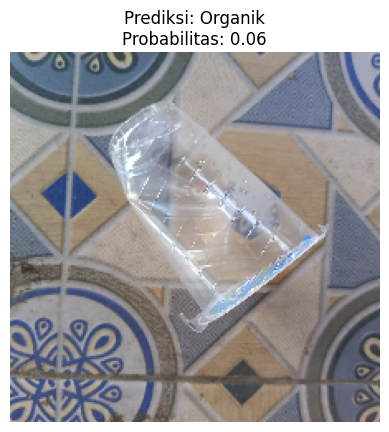

In [46]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik5.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


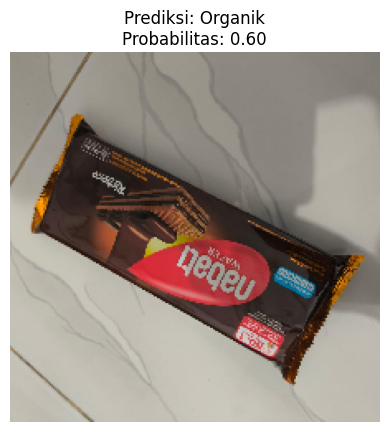

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


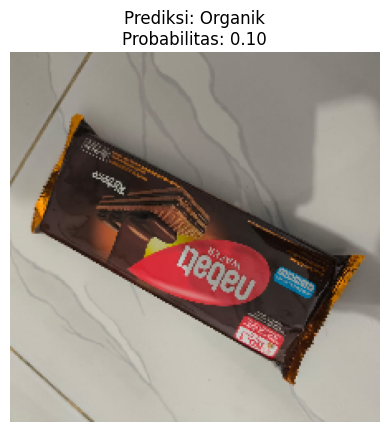

In [47]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik6.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


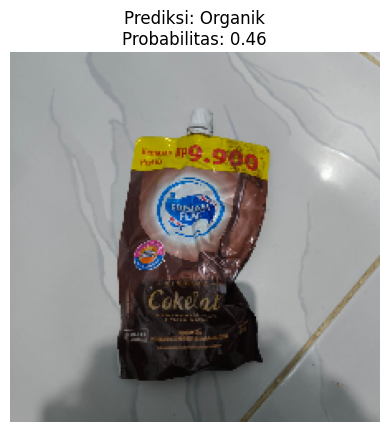

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


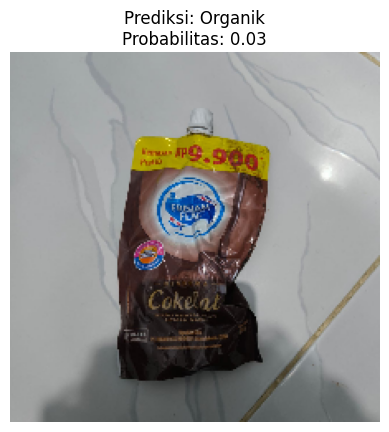

In [48]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik7.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


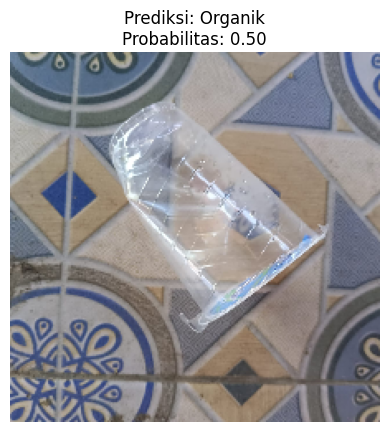

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


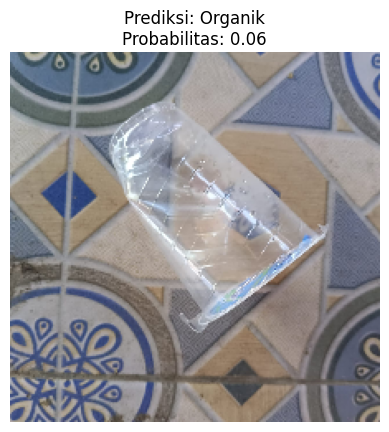

In [49]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik8.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


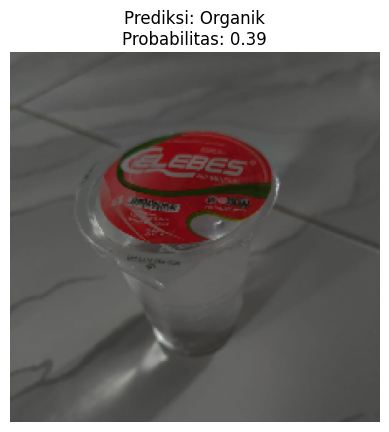

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


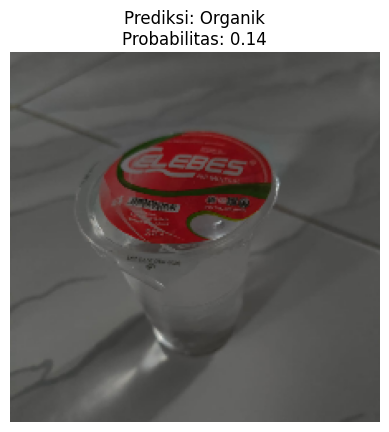

In [50]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik9.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


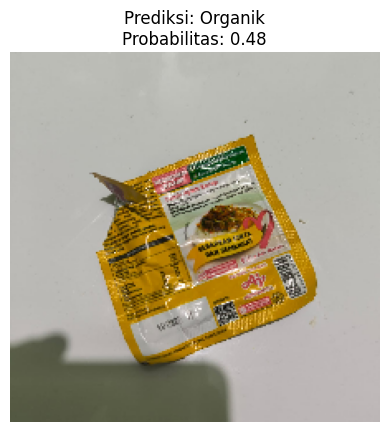

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


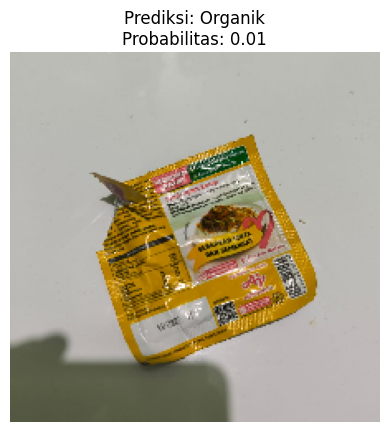

In [51]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik11.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


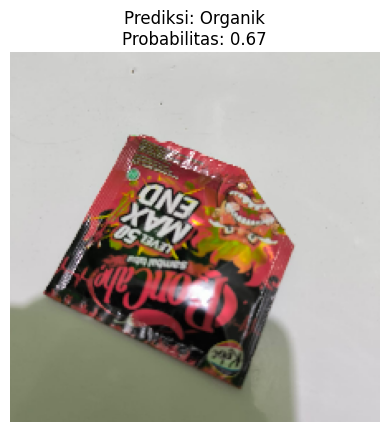

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


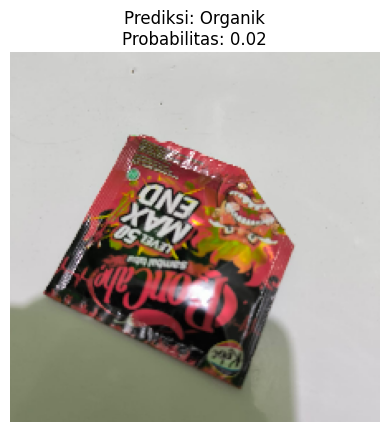

In [52]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik12.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


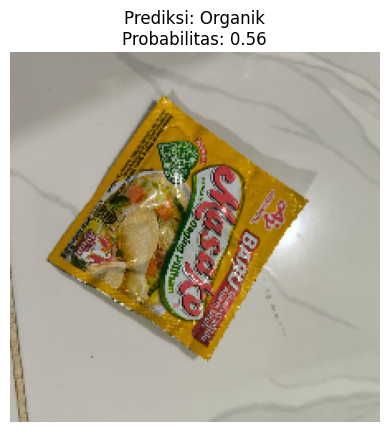

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


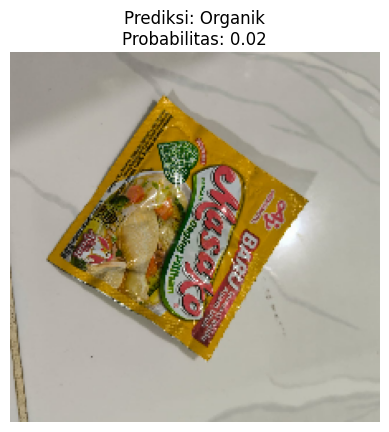

In [53]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik13.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


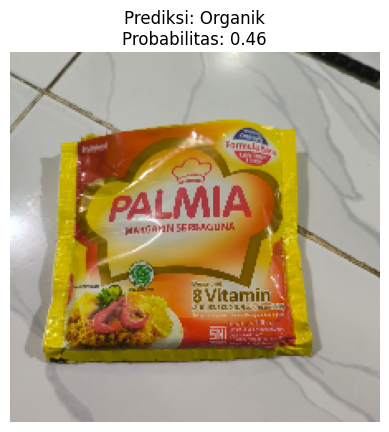

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


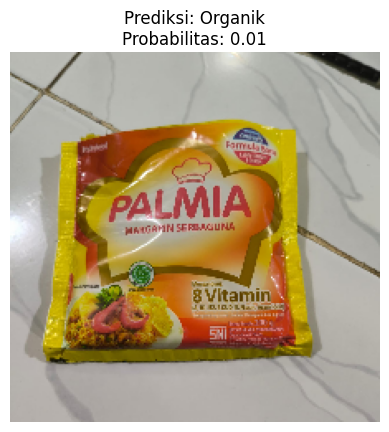

In [54]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik14.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)


Prediksi dengan ResNet50:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


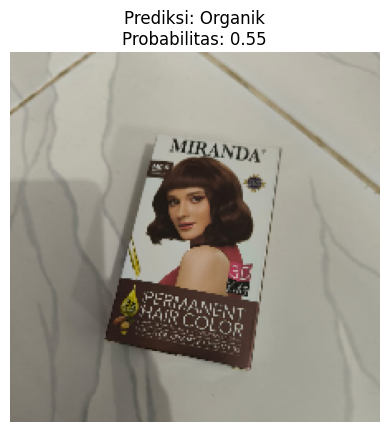

Prediksi dengan VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


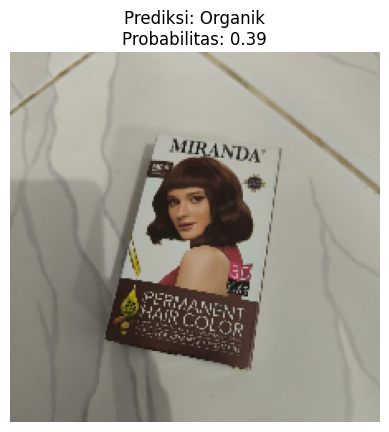

In [55]:
# Path ke gambar Anda
img_path = "C:/Users/TUF/Downloads/anorganik15.jpg"  # Ganti dengan path ke gambar Anda

# Daftar label kelas
class_labels = ['Organik', 'Non-Organik']  # Ganti sesuai label dataset Anda

# Prediksi menggunakan ResNet50
print("Prediksi dengan ResNet50:")
predict_and_show(img_path, model_resnet_pretrained, class_labels)

# Prediksi menggunakan VGG16
print("Prediksi dengan VGG16:")
predict_and_show(img_path, model_vgg16_pretrained, class_labels)
